**Tubes 1 Permodelan Dan Simulasi** 

**Muhammad Zalfa Thoriq**

**1301194473**

**IF - 42 - GAB01**





B. Tugas

Suatu objek dengan massa 0.15 kg ditembakkan dari permukaan tanah dengan 
kecepatan awal 50 m/s dan sudut tembak 35 derajat
. Dengan menggunakan nilai D = 0.0013 
dan Delta t = 0.01
1. Hitung dan bandingkan posisi objek sejak ditembakkan hingga sampai ke
permukaan tanah dengan mengabaikan dan mempertimbangkan hambatan 
udara.
2. Lakukan validasi terhadap hasil perhitungan numerik untuk kasus yang pertama
(tanpa hambatan udara)

In [54]:
import matplotlib.pyplot as plt 
import numpy as np
import math

In [55]:
m = 0.15                #massa
v0 = 50                 #kecepatan awal
o = 35 * math.pi/180    #teta
D = 0.0013              #konstanta
dt = 0.01               #delta t
g = 9.806               #gravitasi
a = -g                  #minus gravitasi

**1. Hitung dan bandingkan posisi objek sejak ditembakkan hingga sampai ke permukaan tanah dengan mengabaikan dan mempertimbangkan hambatan udara**

In [56]:
# Numerik dengan Mempertimbangkan Hambatan

def numerik_mempertimbangkan(v0, o, dt, g, m, D):
  x = 0
  y = 0
  t = 0
  x_array = []
  y_array = []

  vx = v0 * np.cos(o)
  vy = v0 * np.sin(o)

  ax = -(D/m) * v0 * vx
  ay = -g - (D/m) * v0 * vy

  while y >= 0:
    x_array.append(x)
    y_array.append(y)
    t += dt

    vx = vx + (ax * dt)
    vy = vy + (ay * dt)

    v = np.sqrt(pow(vx,2) + pow(vy,2))
    x = x + (vx * dt)
    y = y + (vy * dt)

    ax = -(D/m) * v * vx
    ay = -g - ((D/m) * v * vy)
  
  return x_array,y_array

In [57]:
# Numerik dengan Mengabaikan Hambatan

def numerik_mengabaikan(v0, o, dt, a):
  x = 0
  y = 0
  t = 0
  x_array = []
  y_array = []

  vx = v0 * np.cos(o) 
  vy = v0 * np.sin(o)

  while y >= 0:
    x_array.append(x)
    y_array.append(y)
    t += dt

    vy = vy + (a * dt)

    x = x + (vx * dt)
    y = y + (vy * dt)
  
  return x_array,y_array

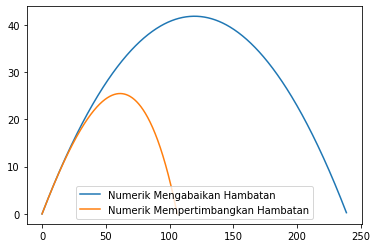

Jarak Maksimum:  239.1923969323856
tinggi Maksimum:  41.93722050725273


In [58]:
x_mengabaikan, y_mengabaikan = numerik_mengabaikan(v0, o, dt, a)
x_mempertimbangkan, y_mempertimbangkan = numerik_mempertimbangkan(v0, o, dt, g, m, D)

mengabaikan, = plt.plot(x_mengabaikan, y_mengabaikan, label = 'Numerik Mengabaikan Hambatan')
mempertimbangkan, = plt.plot(x_mempertimbangkan, y_mempertimbangkan, label = 'Numerik Mempertimbangkan Hambatan')
plt.legend(handles=[mengabaikan, mempertimbangkan])
plt.show()
print("Jarak Maksimum: ",max(x_array))
print("tinggi Maksimum: ",max(y_array))

**2. Lakukan validasi terhadap hasil perhitungan numerik untuk kasus yang pertama (tanpa hambatan udara).**

In [59]:
# perhitungan Analitik

def analitik(v0, o, dt, g, a):
  t_total = (2 * v0 * np.sin(o))/g
  t_arr = np.arange(0,t_total, dt)

  x = v0 * np.cos(o) * t_total
  x_arr = v0 * t_arr * np.cos(o)

  y = v0**2 * (np.sin(o))**2/(2*a)
  y_arr = v0 * t_arr * np.sin(o) - (1/2 * g * (t_arr)**2)

  return x_array, y_array, t_total

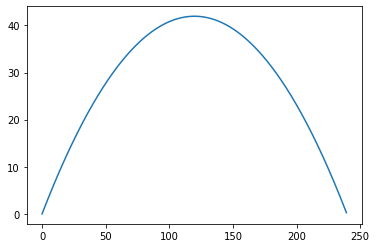

In [60]:
x_array, y_array, ttot = analitik(v0, o, dt, g, a)

plt.plot(x_array,y_array)

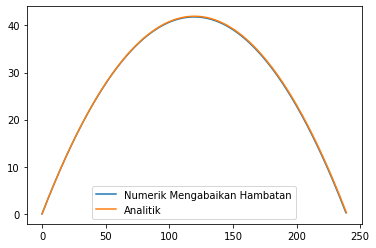

In [61]:
mengabaikan, = plt.plot(x_mengabaikan, y_mengabaikan, label = 'Numerik Mengabaikan Hambatan')
Analitik, = plt.plot(x_array,y_array, label = 'Analitik')
plt.legend(handles=[mengabaikan, Analitik])
plt.show()